In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDRegressor,SGDClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestClassifier
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,roc_auc_score,f1_score,recall_score,roc_curve,auc,precision_score

In [233]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [234]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [236]:
#Null values are present as per above output.For few columns non-null value counts is not matching with total record count
#Lets replace null values with mean incase of number and mode in case of string 
for col in df.columns:
    if(is_string_dtype(df[col])):
        impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        df[col]=impute.fit_transform(df[[col]]).ravel()
    else:   
        impute=SimpleImputer(missing_values=np.nan,strategy='mean')
        df[col]=impute.fit_transform(df[[col]]).ravel()

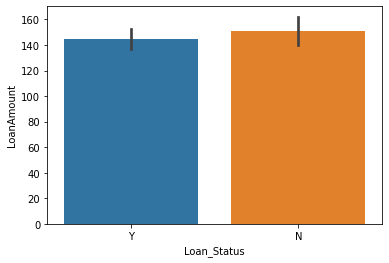

In [237]:
sns.barplot(data=df,x='Loan_Status',y='LoanAmount')


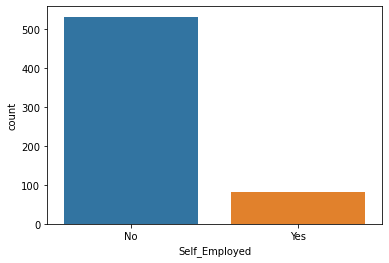

In [238]:
sns.countplot(data=df,x='Self_Employed')
#Job holder applying more loan comapre to self employed

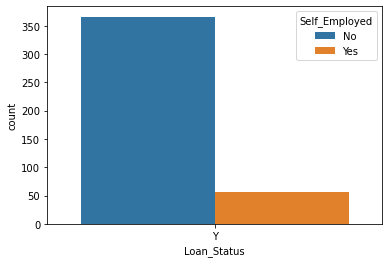

In [239]:
df_filter=df[df.Loan_Status=='Y']
sns.countplot(data=df_filter,x='Loan_Status',hue='Self_Employed')
#Job holder's loan approval percentage is good compare to self employed 

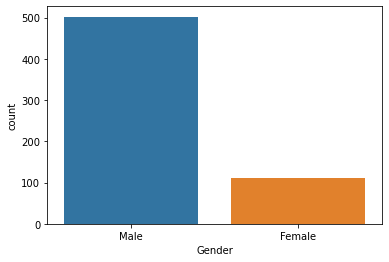

In [240]:
sns.countplot(data=df,x='Gender')
# Men applying more for loan compared to women

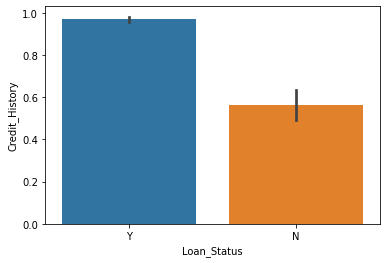

In [241]:
sns.barplot(data=df,x='Loan_Status',y='Credit_History')
#people with credit history 6 or more getting more approval of loan 

In [242]:

#Lets print unique values for each column
for col in df.columns:
    print("***************",col,"************")
    print(df[col].value_counts())
    print('\n')


*************** Loan_ID ************
LP001155    1
LP002224    1
LP002386    1
LP001990    1
LP001806    1
           ..
LP002501    1
LP002263    1
LP002560    1
LP001846    1
LP001036    1
Name: Loan_ID, Length: 614, dtype: int64


*************** Gender ************
Male      502
Female    112
Name: Gender, dtype: int64


*************** Married ************
Yes    401
No     213
Name: Married, dtype: int64


*************** Dependents ************
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


*************** Education ************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


*************** Self_Employed ************
No     532
Yes     82
Name: Self_Employed, dtype: int64


*************** ApplicantIncome ************
2500.0    9
2600.0    6
4583.0    6
6000.0    6
3750.0    5
         ..
2787.0    1
3652.0    1
6540.0    1
3340.0    1
6333.0    1
Name: ApplicantIncome, Length: 505, dtype: int64


*************** CoapplicantInco

In [243]:
df.isin(['?']).sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [244]:
#convert string data to int
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [245]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C06810EBE0>,
      dtype=object)

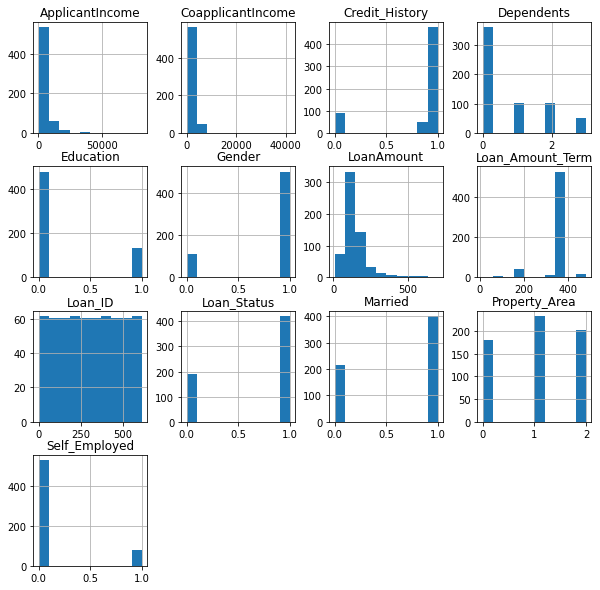

In [246]:
df.hist(figsize=(10,10))

<Figure size 1080x1080 with 0 Axes>

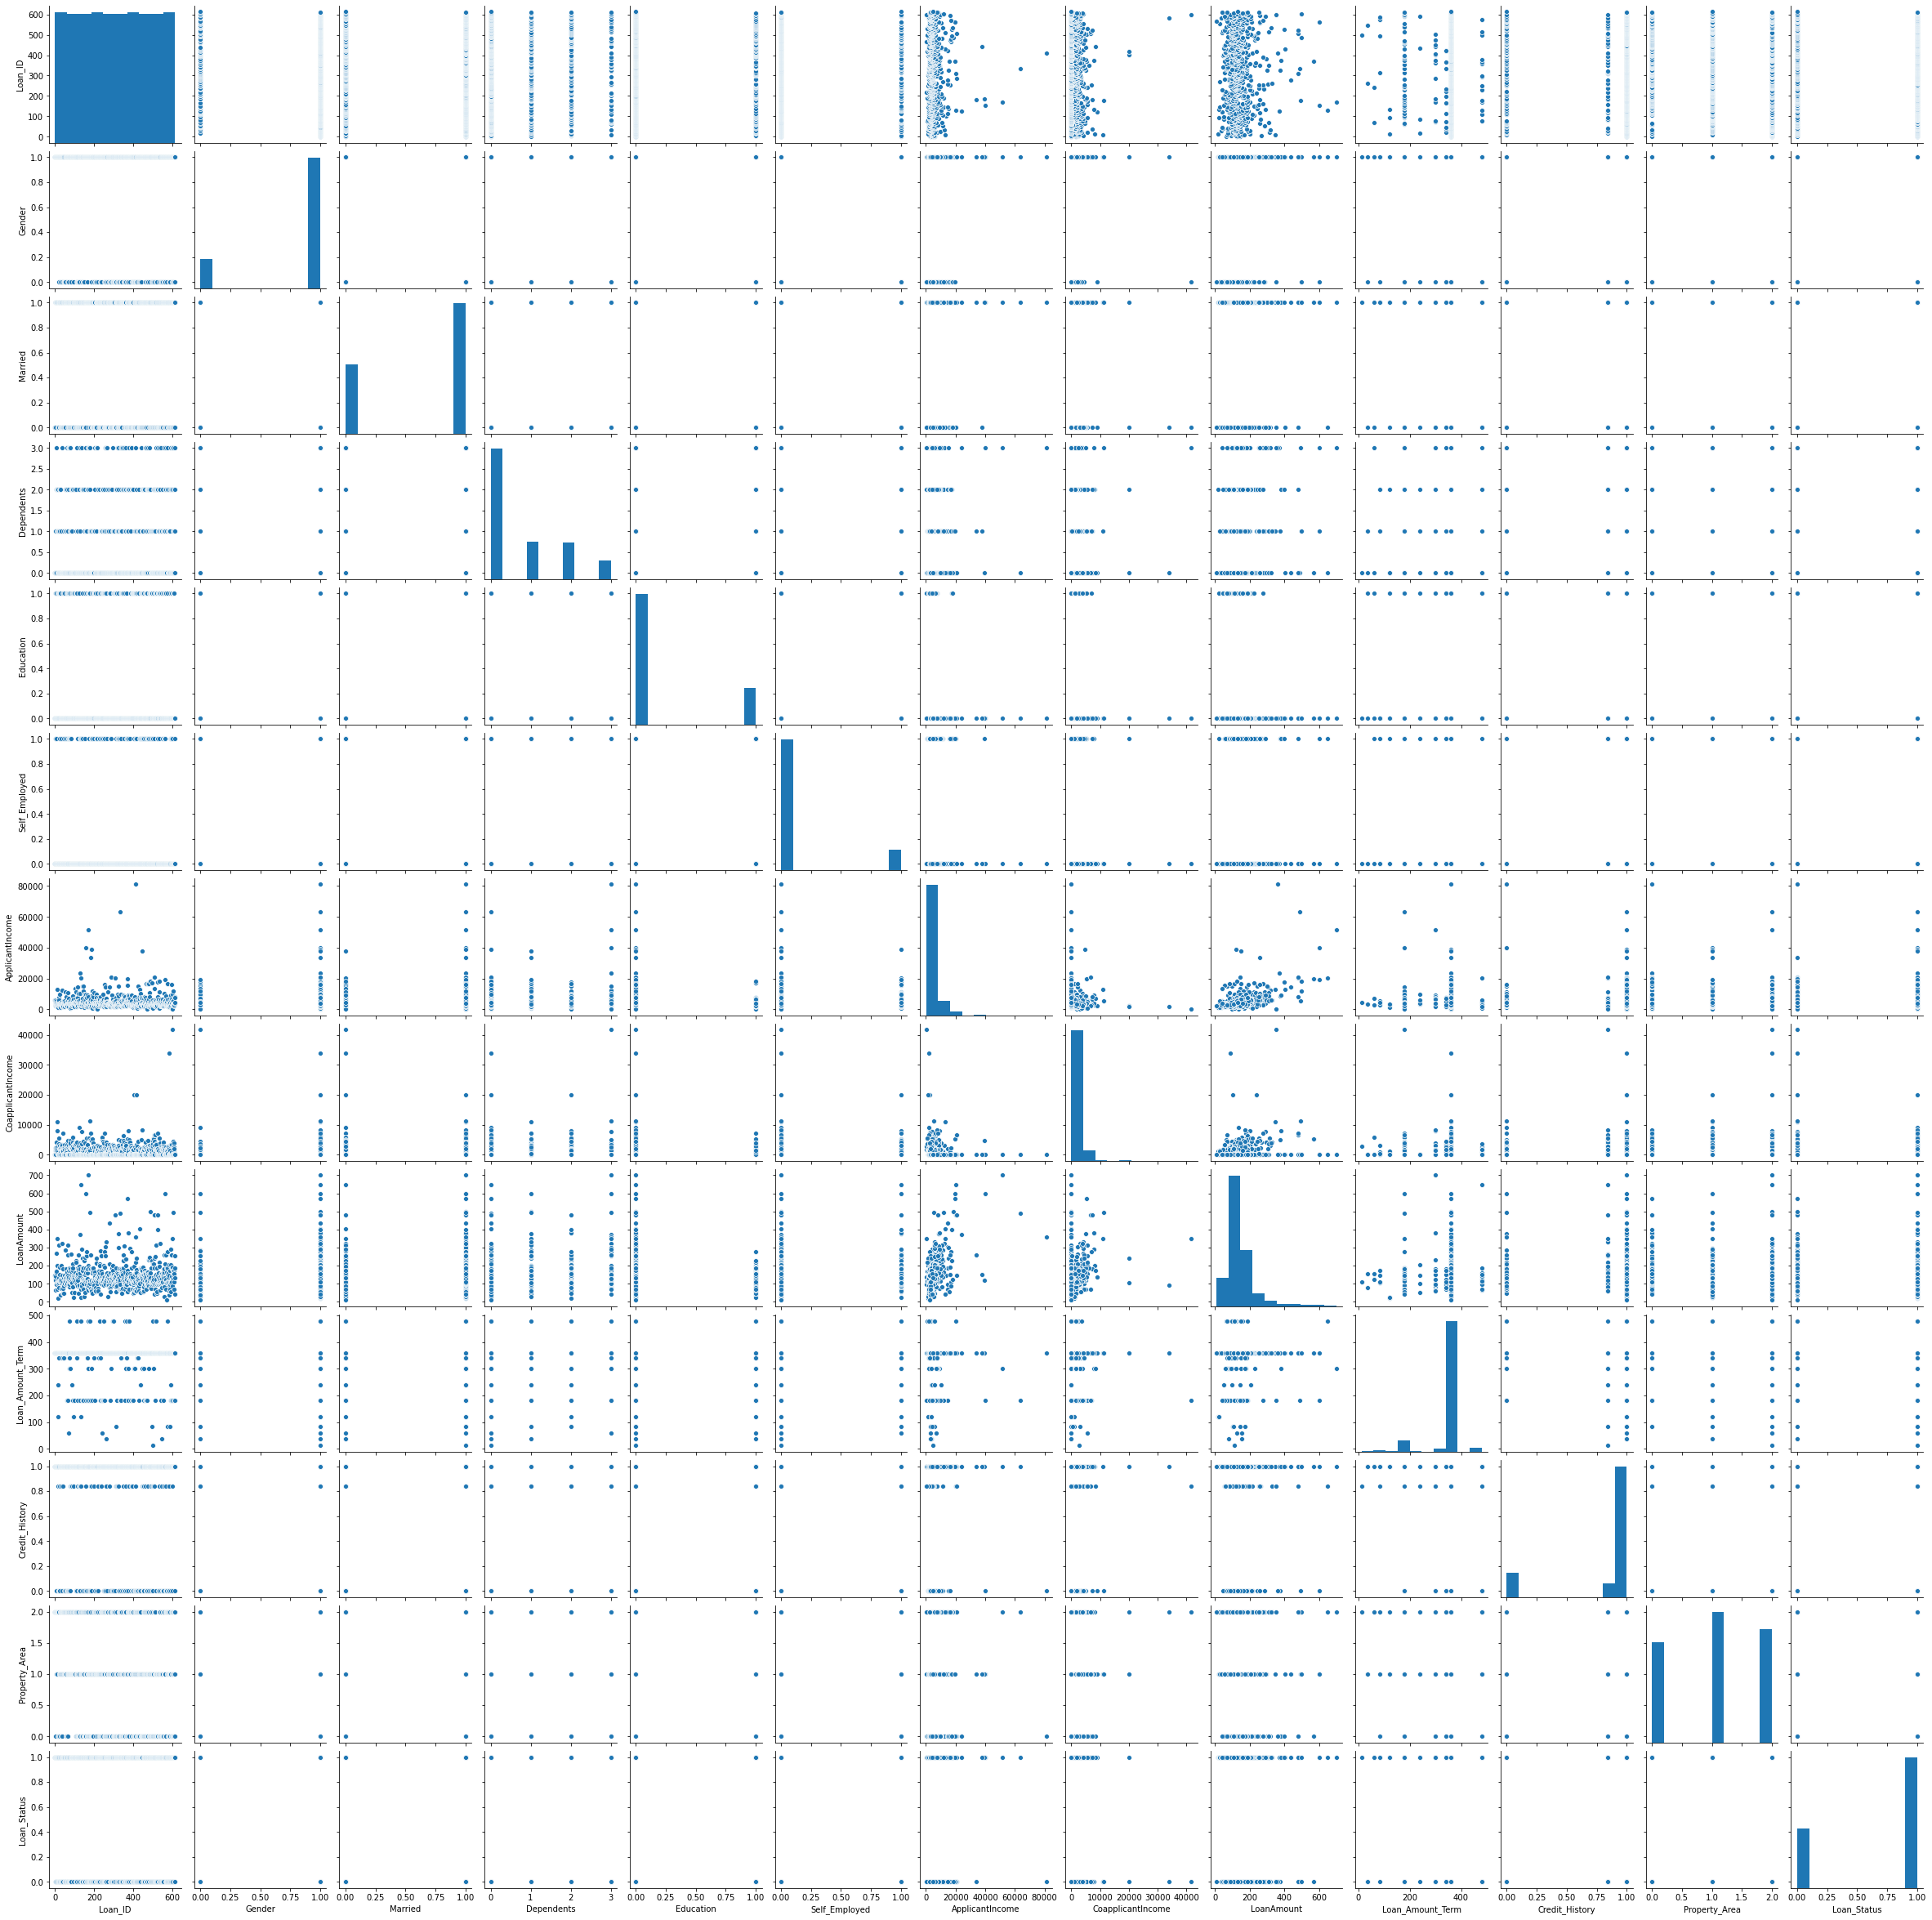

In [247]:
#skewed data present in column dependents,Loan_Amount,ApplicantIncome
plt.figure(figsize=(15,15))
sns.pairplot(data=df)

In [248]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [249]:
#ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term column has skewed data
#Laon_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term has outliers
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [250]:
#remove skewed data
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

In [251]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           0.671985
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Loan_ID                 AxesSubplot(0.125,0.749828;0.227941x0.130172)
Gender               AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Married              AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Dependents              AxesSubplot(0.125,0.593621;0.227941x0.130172)
Education            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Self_Employed        AxesSubplot(0.672059,0.593621;0.227941x0.130172)
ApplicantIncome         AxesSubplot(0.125,0.437414;0.227941x0.130172)
CoapplicantIncome    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
LoanAmount           AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Loan_Amount_Term        AxesSubplot(0.125,0.281207;0.227941x0.130172)
Credit_History       AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Property_Area        AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Loan_Status                AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

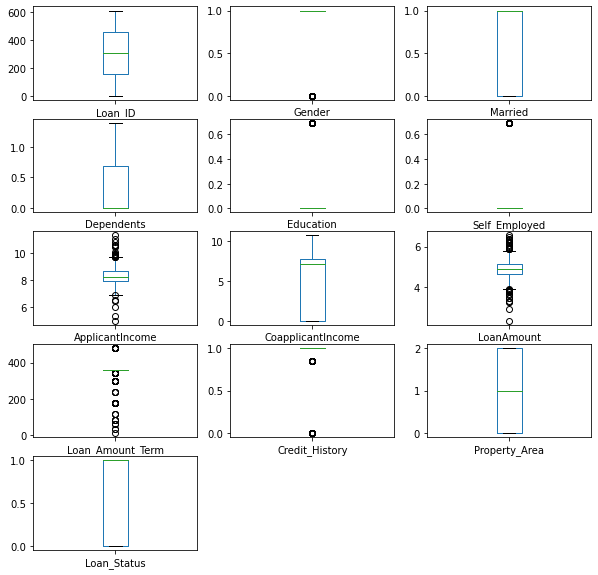

In [252]:
df.plot.box(subplots=True,layout=(5,3),figsize=(10,10))

In [253]:
#from above output we can see thr r few outliers present in dataset
#remove outliers
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(587, 13)

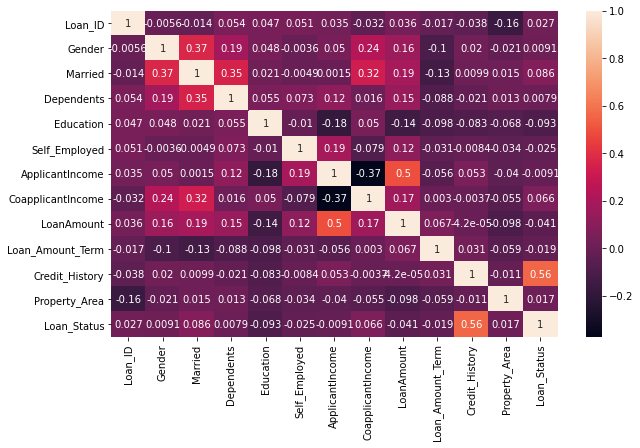

In [254]:
corr_=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_,annot=True)

In [255]:
#Loan_status is strongly corelated with Credit_History
#drop Loan_ID as it is just an application id .
df=df.drop('Loan_ID',axis=1)

In [256]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
print(x.shape,y.shape)

(587, 11) (587,)


In [257]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[ 0.46944033, -1.36506946, -0.78026776, ...,  0.23724412,
         0.45531619,  1.22851481],
       [ 0.46944033,  0.73256345,  0.56391063, ...,  0.23724412,
         0.45531619, -1.30624158],
       [ 0.46944033,  0.73256345, -0.78026776, ...,  0.23724412,
         0.45531619,  1.22851481],
       ...,
       [ 0.46944033,  0.73256345,  0.56391063, ...,  0.23724412,
         0.45531619,  1.22851481],
       [ 0.46944033,  0.73256345,  1.35020458, ...,  0.23724412,
         0.45531619,  1.22851481],
       [-2.1301962 , -1.36506946, -0.78026776, ...,  0.23724412,
        -2.38017947, -0.03886339]])

In [258]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [259]:
params_={'kernel':['linear','rbf','poly']}
svr=SVC()
print("dtree_reg best param :",findBestParam(svr,params_))


dtree_reg best param : {'kernel': 'linear'}


In [260]:
params_={'criterion':['gini','entropy'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeClassifier()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))


dtree_reg best param : {'criterion': 'entropy', 'max_depth': 2}


In [261]:
params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsClassifier()
print("kn_reg best param :",findBestParam(kn_reg,params_))


kn_reg best param : {'n_neighbors': 10}


In [262]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDClassifier()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))


sgd_reg best param : {'alpha': 0.001, 'penalty': 'l1'}


In [263]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
gradient_reg=GradientBoostingClassifier()
print("gradient_reg best param :",findBestParam(gradient_reg,params_))

gradient_reg best param : {'learning_rate': 0.01}


In [264]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'base_estimator':[dtree_reg,kn_reg,sgd_reg]}
ada_reg=AdaBoostClassifier()
print("ada_reg best param :",findBestParam(ada_reg,params_))


ada_reg best param : {'base_estimator': DecisionTreeClassifier(), 'learning_rate': 1.0}


In [265]:
params_={'n_estimators':[10,50,100,150,200],'max_depth':[2,5,10,15],'criterion':['gini','entropy']}
rand_reg=RandomForestClassifier()
print("rand_reg best param :",findBestParam(rand_reg,params_))

rand_reg best param : {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}


In [274]:
lr_reg=LogisticRegression()
mul_nb=MultinomialNB()
gaus_nb=GaussianNB()
svr=SVC(kernel='linear')
dtree_reg=DecisionTreeClassifier(criterion='entropy',max_depth=2)
kn_reg=KNeighborsClassifier(n_neighbors=10)
sgd_reg=SGDClassifier(alpha=0.001,penalty='l1')
gradient_reg=GradientBoostingClassifier(learning_rate=0.01)
ada_reg=AdaBoostClassifier(learning_rate=1.0,base_estimator=dtree_reg)
rand_reg=RandomForestClassifier(n_estimators=100,max_depth=2,criterion='gini')

In [275]:
models=[]
models.append(('LogisticRegression',lr_reg))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('GaussianNB',gaus_nb))
#models.append(('MultinomialNB',mul_nb))
models.append(('Gradient Boost',gradient_reg))
models.append(('Ada Boost',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))

In [276]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [277]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    roc_auc_score_list.append(roc_auc_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    precission_score_list.append(precision_score(y_test,y_pred))
    recall_score_list.append(recall_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [278]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list,'roc_auc_score':roc_auc_score_list,'f1_score':f1_score_list,'precision_Score':precission_score_list,'recall_score':recall_score_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score,roc_auc_score,f1_score,precision_Score,recall_score
0,LogisticRegression,0.817855,0.796610,0.714286,0.863636,0.760000,1.000000
1,SVC,0.816131,0.796610,0.714286,0.863636,0.760000,1.000000
2,DecisionTreeClassifier,0.809351,0.796610,0.714286,0.863636,0.760000,1.000000
3,KNeighborsClassifier,0.816102,0.796610,0.714286,0.863636,0.760000,1.000000
4,SGDClassifier,0.816131,0.796610,0.714286,0.863636,0.760000,1.000000
5,GaussianNB,0.814436,0.788136,0.707707,0.857143,0.757576,0.986842
6,Gradient Boost,0.807656,0.796610,0.714286,0.863636,0.760000,1.000000
7,Ada Boost,0.734278,0.754237,0.702694,0.822086,0.770115,0.881579
8,RandomForestClassifier,0.814436,0.796610,0.714286,0.863636,0.760000,1.000000


In [282]:
#from above matrix LogisticRegression working better compare to other estimator .

lr_reg.fit(x_train,y_train)
y_pred=lr_reg.predict(x_test)
print('score',lr_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

#precision: percent of correct prediction(+ve/-ve)
#recall:what % of +ve cases did you catch
#f1-score:percent of correct +ve prediction


score 0.8208955223880597
accuracy_score 0.7966101694915254
confusion_matrix 
 [[18 24]
 [ 0 76]]
classification_report               precision    recall  f1-score   support

           0       1.00      0.43      0.60        42
           1       0.76      1.00      0.86        76

    accuracy                           0.80       118
   macro avg       0.88      0.71      0.73       118
weighted avg       0.85      0.80      0.77       118



0.7142857142857143


Text(0, 0.5, 'True +ve Rate')

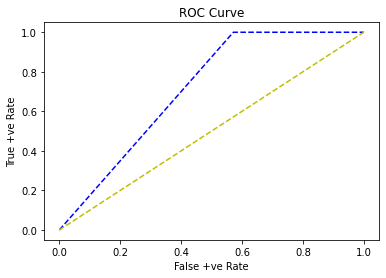

In [283]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr,tpr,'b--')
plt.plot([0,1],[0,1],'y--')
#plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')


In [284]:
joblib.dump(lr_reg,'Fraud_Loan_Prediction.pkl')

['Fraud_Loan_Prediction.pkl']